### Import the Necessary Packages:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math
%matplotlib inline
import os

In [2]:
# Filtering out the warnings

import warnings
warnings.filterwarnings('ignore')

## Pandas Rows and columns configuration:

In [3]:
## set this display max columns and rows as 300,assuming max rows and columns can be 300.
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

## Read CSV Files from Dataset Directory:

In [4]:
## get the current directory path
os.getcwd()

'C:\\Users\\Gayathri\\Desktop\\UpGrad\\CREDIT-EDA\\Credit-EDA'

In [5]:
## go to the datsets directory in current path 
file_path = os.path.join(os.getcwd(), os.getcwd()+"/Datasets", "application_data.csv")

In [6]:
file_path

'C:\\Users\\Gayathri\\Desktop\\UpGrad\\CREDIT-EDA\\Credit-EDA/Datasets\\application_data.csv'

In [7]:
## read the csv file
application_dataset = pd.read_csv(file_path)

In [8]:
application_dataset.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### Basic stats about rows and columns and Missing values:

In [9]:
application_dataset.shape

(307511, 122)

### From the Shape,We Can See that 307511 rows and 122 columns, these 122 columns may not be useful for the ### analysis,we can eliminate irrelevant columns and perform analysis on the selected ones which are important to the business logic.

In [10]:
application_dataset.info(max_cols = 300)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

## Data Cleaning Sanity Checks:

#### 1. Missing values identification and scenarios.

#### 2. Eliminate the columns if missing values percentage greater than 40%.

#### 3. Remove unnecessary columns we cant get any insights from them.

#### 4. Drop the records if missing values percentage less than 5%.

#### 5. Conversion of negative values to positive for few columns.

#### 6. Missing values Imputation for categorical values.

#### 7. Missing values Imputation for numerical values.

#### 8.Outliers Detection in numerical values.

#### 9.Sanity Check : Typecast DataTypes.


### Missing values Identification and Scenarios:



### 1 . Calculate the Missing values percentage formula = (missing values in each row/ total rows) * 100 for each and every column.

In [11]:
missing_values = (application_dataset.isnull().sum()/len(application_dataset))*100

In [12]:
missing_values

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [13]:
## drop the columns whenever missing values greater than 40% because we cant use these for analysis
columns_to_drop=application_dataset.columns[application_dataset.isnull().sum() >= (0.50*len(application_dataset))]
len(columns_to_drop)

41

In [14]:
application_dataset.drop(columns_to_drop, inplace = True, axis = 1)


## Irrelevant Columns Elimination:

In [15]:
unnecessary_columns = ['EXT_SOURCE_2', 'EXT_SOURCE_3','FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4',
                       'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
                       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 
                       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
                       'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

In [16]:
len(unnecessary_columns)

22

# Reasons for Irrelevant columns : 
## External sources:
   ###  1.These columns are irreleveant because it has the information collected from the external data,since we dont know the exact source from this data collected we cannot get any meaningful insights from them.
   
## Flag Documents:
   ###  2. Flag documents are the various types of documents provided by customer , since we dont know what types of documents provided by the customer, we can eliminate them completely.
   
### Apartment Variables:
   ### 3. These are the normalized information from the external source.These might not be helpful in analysis with target variable. 
   
### Note: I am not eliminating these columns from the original dataset..!!

In [17]:
application_dataset =  application_dataset.drop(unnecessary_columns, axis = 1)


### Eliminate the records if missing values percentage greater  than 0% and less than or equal to 5%.
### since these are very less records proportion to total records,we can eliminate the records..!!

In [18]:
Five_percentage_columns =application_dataset.columns[(application_dataset.isnull().sum() <= (0.05*len(application_dataset)))&(application_dataset.isnull().sum() > (0*len(application_dataset)))]


In [19]:
Five_percentage_columns

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'CNT_FAM_MEMBERS',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')

In [20]:
## verify the above records drop the above columns wherever it is null.
(application_dataset.isnull().sum()/len(application_dataset))*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0.000000
FLAG_WORK_PHONE                  0

In [21]:
## drop the missing values records for the above columns
## columns used : ['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'CNT_FAM_MEMBERS','OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE'],
application_dataset = application_dataset.dropna(subset=Five_percentage_columns).reset_index(drop=True)

In [22]:
application_dataset.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


## Conversion of negative to positive:

In [23]:
application_dataset['DAYS_BIRTH'] = application_dataset['DAYS_BIRTH'].abs()
application_dataset['DAYS_EMPLOYED'] = application_dataset['DAYS_EMPLOYED'].abs()
application_dataset['DAYS_REGISTRATION'] = application_dataset['DAYS_REGISTRATION'].abs()
application_dataset['DAYS_ID_PUBLISH'] = application_dataset['DAYS_ID_PUBLISH'].abs()
application_dataset['DAYS_LAST_PHONE_CHANGE'] = application_dataset['DAYS_LAST_PHONE_CHANGE'].abs()


### Why should we convert the above columns into positive values:
    
### 1.For all these columns,duration or period of check cannot be negative.so need to convert this into positive values.

### Missing values Imputation for categorical Variables:

In [24]:
## identify the categorical columns
categorical_columns = application_dataset.select_dtypes(include=["bool","object","category"]).columns

In [25]:
categorical_columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
       'EMERGENCYSTATE_MODE'],
      dtype='object')

In [26]:
## Null percentage for categorical columns
((application_dataset[categorical_columns].isnull().sum())/len(application_dataset))*100

NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
NAME_TYPE_SUITE                0.000000
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
OCCUPATION_TYPE               31.351475
WEEKDAY_APPR_PROCESS_START     0.000000
ORGANIZATION_TYPE              0.000000
EMERGENCYSTATE_MODE           47.451873
dtype: float64

#### From these we can see that OCCUPATION_TYPE have the highest percentage.

### 1.Replace the missing values for occupation_type:

<AxesSubplot:>

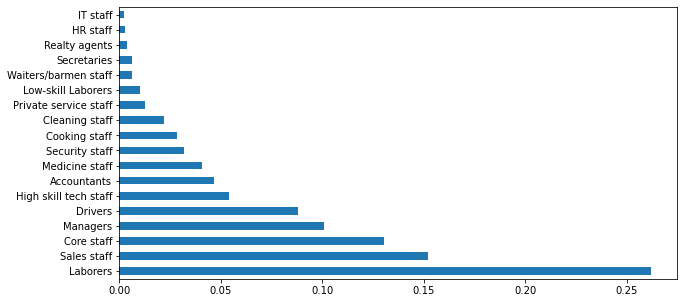

In [27]:
application_dataset["OCCUPATION_TYPE"].value_counts(normalize = True).plot.barh(figsize = (10,5))

### Reasons:

#### 1. Since the null value percentage  is huge,we cannot replace with the mode "laborers" without having proper source of income and information about the various occupational salary ranges. so we are replacing it as other category.

In [28]:
## replace the missing value for occupation_type as other_category
##application_dataset["OCCUPATION_TYPE"] = application_dataset["OCCUPATION_TYPE"].fillna("Other_Category")

## Missing values Imputation for numerical columns:

In [29]:
numerical_columns = application_dataset.select_dtypes(include=["number"]).columns

In [30]:
numerical_columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_

In [31]:
((application_dataset[numerical_columns].isnull().sum())/len(application_dataset))*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.000000
AMT_GOODS_PRICE                  0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0.000000
FLAG_WORK_PHONE                  0.000000
FLAG_CONT_MOBILE                 0.000000
FLAG_PHONE                       0.000000
FLAG_EMAIL                       0.000000
CNT_FAM_MEMBERS                  0.000000
REGION_RATING_CLIENT             0.000000
REGION_RATING_CLIENT_W_CITY      0.000000
HOUR_APPR_PROCESS_START          0.000000
REG_REGION_NOT_LIVE_REGION       0.000000
REG_REGION_NOT_WORK_REGION       0

In [32]:
application_dataset[numerical_columns]

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,1.0,2,2,9,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,2.0,2,2,17,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,1.0,2,2,11,0,0,0,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305180,456251,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,9327,236,8456.0,1982,1,1,0,1,0,0,1.0,1,1,15,0,0,0,0,0,0,0.9876,0.6042,0.9782,0.4583,0.9876,0.6042,0.2898,0.0,0.0,0.0,0.0,273.0,NaN,NaN,NaN,NaN,NaN,NaN
305181,456252,0,0,72000.0,269550.0,12001.5,225000.0,0.025164,20775,365243,4388.0,4090,1,0,0,1,1,0,1.0,2,2,8,0,0,0,0,0,0,0.9727,0.0833,0.9727,0.0833,0.9727,0.0833,0.0214,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
305182,456253,0,0,153000.0,677664.0,29979.0,585000.0,0.005002,14966,7921,6737.0,5150,1,1,0,1,0,1,1.0,3,3,9,0,0,0,0,1,1,0.9816,0.1667,0.9816,0.1667,0.9816,0.1667,0.7970,6.0,0.0,6.0,0.0,1909.0,1.0,0.0,0.0,1.0,0.0,1.0
305183,456254,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,11961,4786,2562.0,931,1,1,0,1,0,0,2.0,2,2,9,0,0,0,1,1,0,0.9771,0.0417,0.9772,0.0417,0.9771,0.0417,0.0086,0.0,0.0,0.0,0.0,322.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
len(categorical_columns)

13

In [34]:
len(numerical_columns)

46

###  Imputation on with Mean for below application_dataset variables/Columns


AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QTR,AMT_REQ_CREDIT_BUREAU_YEAR 

### AMT_REQ_CREDIT_BUREAU_HOUR:

Statistical Summary :
 count    263947.000000
mean          0.006376
std           0.083726
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64


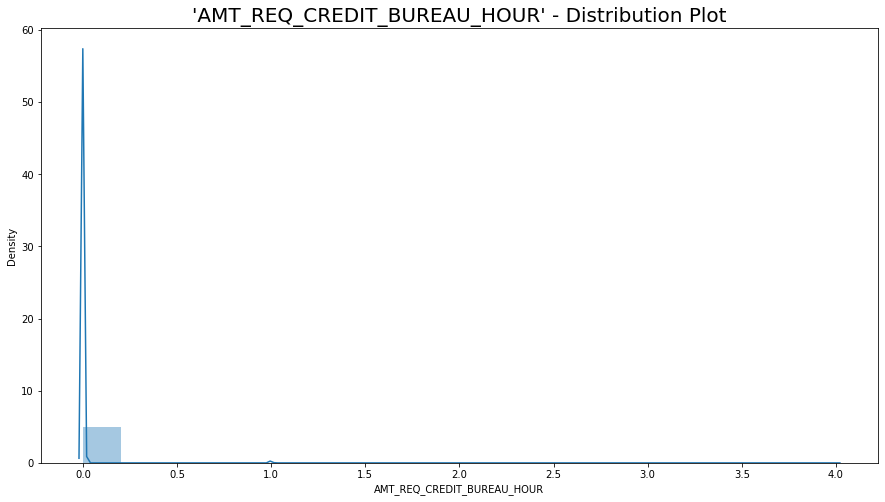

Missing values can be imputed with Average value : 0.006376280086532524


In [35]:
print("Statistical Summary :\n",application_dataset['AMT_REQ_CREDIT_BUREAU_HOUR'].describe())

plt.figure(figsize = (15,8))
sns.distplot(application_dataset['AMT_REQ_CREDIT_BUREAU_HOUR'] , bins = 20)
plt.title("'AMT_REQ_CREDIT_BUREAU_HOUR' - Distribution Plot", fontsize = 20 )
plt.show()

print(f"Missing values can be imputed with Average value : {application_dataset['AMT_REQ_CREDIT_BUREAU_HOUR'].mean()}")

In [36]:
## Impute the missing value with mean

## application_dataset['AMT_REQ_CREDIT_BUREAU_HOUR'] = application_dataset['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(application_dataset['AMT_REQ_CREDIT_BUREAU_HOUR'].mean())

###  AMT_REQ_CREDIT_BUREAU_DAY

Statistical Summary :
 count    263947.000000
mean          0.007001
std           0.110641
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64


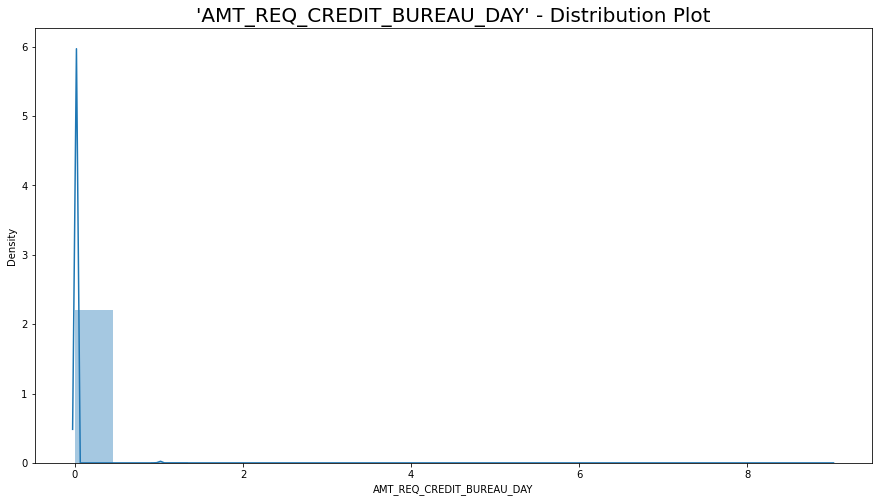

Missing values can be imputed with Average Column value : 0.007001405585212183


In [37]:
print("Statistical Summary :\n",application_dataset['AMT_REQ_CREDIT_BUREAU_DAY'].describe())

plt.figure(figsize = (15,8))
sns.distplot(application_dataset['AMT_REQ_CREDIT_BUREAU_DAY'] , bins = 20)
plt.title("'AMT_REQ_CREDIT_BUREAU_DAY' - Distribution Plot", fontsize = 20 )
plt.show()

print(f"Missing values can be imputed with Average Column value : {application_dataset['AMT_REQ_CREDIT_BUREAU_DAY'].mean()}")

In [38]:
## Impute the missing value for occupation_type as other_category
## application_dataset['AMT_REQ_CREDIT_BUREAU_DAY'] = application_dataset['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(application_dataset['AMT_REQ_CREDIT_BUREAU_DAY'].mean())

### AMT_REQ_CREDIT_BUREAU_WEEK

Statistical Summary :
 count    263947.000000
mean          0.034488
std           0.204896
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64


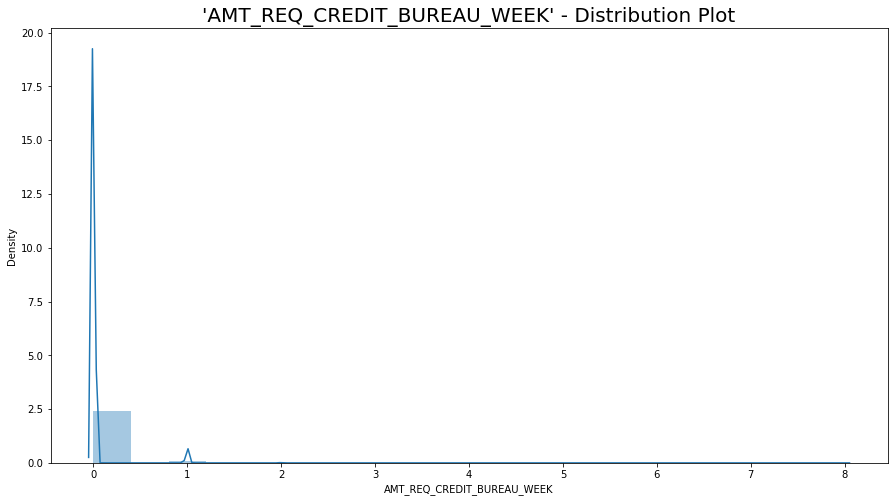

Missing values can be imputed with Average Column value : 0.0344879843301875


In [39]:
print("Statistical Summary :\n",application_dataset['AMT_REQ_CREDIT_BUREAU_WEEK'].describe())

plt.figure(figsize = (15,8))
sns.distplot(application_dataset['AMT_REQ_CREDIT_BUREAU_WEEK'] , bins = 20)
plt.title("'AMT_REQ_CREDIT_BUREAU_WEEK' - Distribution Plot", fontsize = 20 )
plt.show()

print(f"Missing values can be imputed with Average Column value : {application_dataset['AMT_REQ_CREDIT_BUREAU_WEEK'].mean()}")

In [40]:
## Impute the missing value for occupation_type as other_category
## application_dataset['AMT_REQ_CREDIT_BUREAU_WEEK'] = application_dataset['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(application_dataset['AMT_REQ_CREDIT_BUREAU_WEEK'].mean())

### AMT_REQ_CREDIT_BUREAU_MON

Statistical Summary :
 count    263947.000000
mean          0.267645
std           0.915195
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64


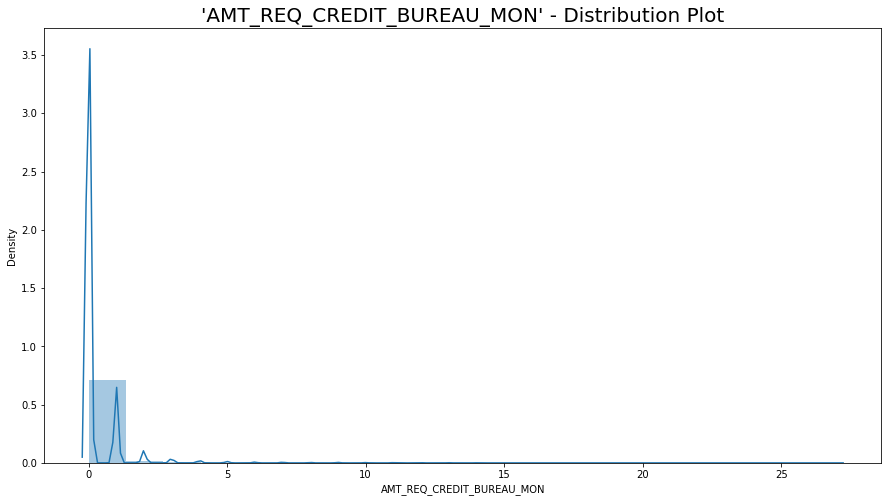

Missing values can be imputed with Average Column value : 0.2676446407801566


In [41]:
print("Statistical Summary :\n",application_dataset['AMT_REQ_CREDIT_BUREAU_MON'].describe())

plt.figure(figsize = (15,8))
sns.distplot(application_dataset['AMT_REQ_CREDIT_BUREAU_MON'] , bins = 20)
plt.title("'AMT_REQ_CREDIT_BUREAU_MON' - Distribution Plot", fontsize = 20 )
plt.show()

print(f"Missing values can be imputed with Average Column value : {application_dataset['AMT_REQ_CREDIT_BUREAU_MON'].mean()}")

In [42]:
## Impute the missing value for occupation_type as other_category
## application_dataset['AMT_REQ_CREDIT_BUREAU_MON'] = application_dataset['AMT_REQ_CREDIT_BUREAU_MON'].fillna(application_dataset['AMT_REQ_CREDIT_BUREAU_MON'].mean())

### AMT_REQ_CREDIT_BUREAU_QRT

Statistical Summary :
 count    263947.000000
mean          0.265868
std           0.795317
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64


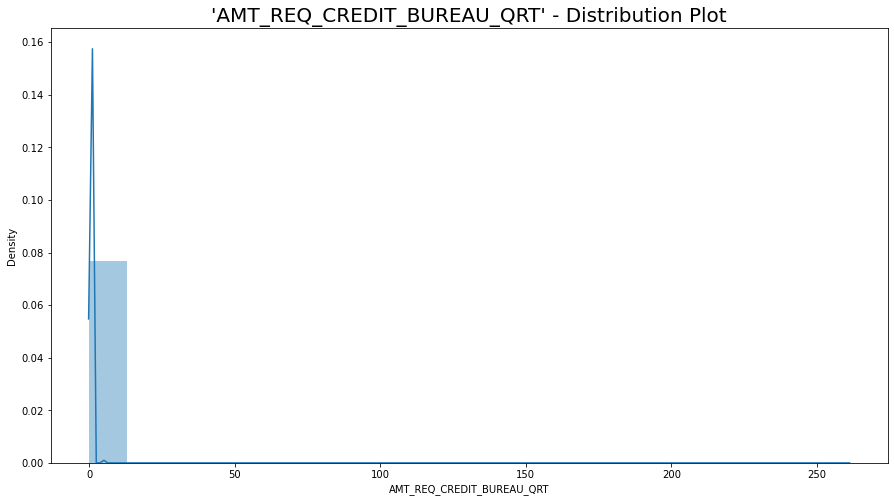

Missing values can be imputed with Average Column value : 0.265867768908152


In [43]:
print("Statistical Summary :\n",application_dataset['AMT_REQ_CREDIT_BUREAU_QRT'].describe())

plt.figure(figsize = (15,8))
sns.distplot(application_dataset['AMT_REQ_CREDIT_BUREAU_QRT'] , bins = 20)
plt.title("'AMT_REQ_CREDIT_BUREAU_QRT' - Distribution Plot", fontsize = 20 )
plt.show()

print(f"Missing values can be imputed with Average Column value : {application_dataset['AMT_REQ_CREDIT_BUREAU_QRT'].mean()}")

In [44]:
## Impute the missing value for occupation_type as other_category
## application_dataset['AMT_REQ_CREDIT_BUREAU_QRT'] = application_dataset['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(application_dataset['AMT_REQ_CREDIT_BUREAU_QRT'].mean())

### AMT_REQ_CREDIT_BUREAU_YEAR

Statistical Summary :
 count    263947.000000
mean          1.904966
std           1.869282
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64


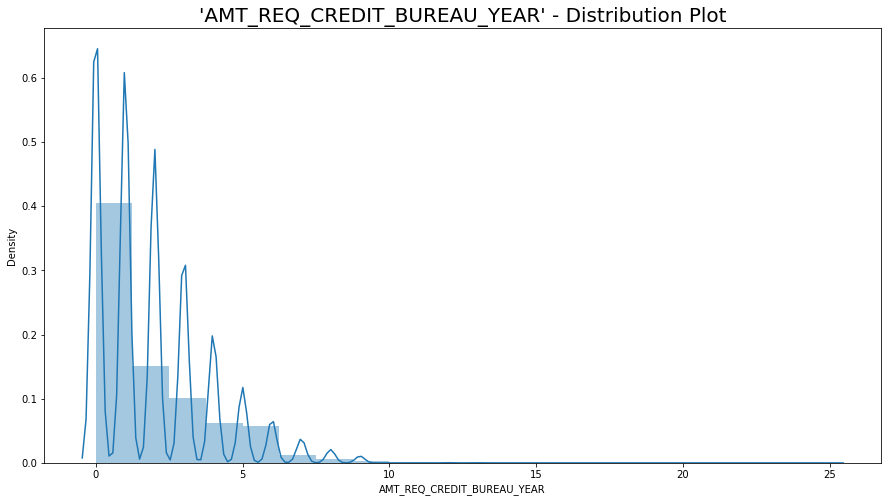

Missing values can be imputed with Average Column value : 1.9049657696431481


In [45]:
print("Statistical Summary :\n",application_dataset['AMT_REQ_CREDIT_BUREAU_YEAR'].describe())

plt.figure(figsize = (15,8))
sns.distplot(application_dataset['AMT_REQ_CREDIT_BUREAU_YEAR'] , bins = 20)
plt.title("'AMT_REQ_CREDIT_BUREAU_YEAR' - Distribution Plot", fontsize = 20 )
plt.show()

print(f"Missing values can be imputed with Average Column value : {application_dataset['AMT_REQ_CREDIT_BUREAU_YEAR'].mean()}")

In [46]:
## Impute the missing value for occupation_type as other_category
## application_dataset['AMT_REQ_CREDIT_BUREAU_YEAR'] = application_dataset['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(application_dataset['AMT_REQ_CREDIT_BUREAU_YEAR'].mean())

### Outliers Detection in Numerical Columns:

#### CNT_CHILDREN

Statistical Summary :
 count    305185.000000
mean          0.417150
std           0.722267
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64
Unique Values & Counts
 0     70.032276
1     19.876141
2      8.701935
3      1.208775
4      0.139587
5      0.027524
6      0.006881
7      0.002294
14     0.000983
19     0.000655
12     0.000655
10     0.000655
9      0.000655
8      0.000655
11     0.000328
Name: CNT_CHILDREN, dtype: float64


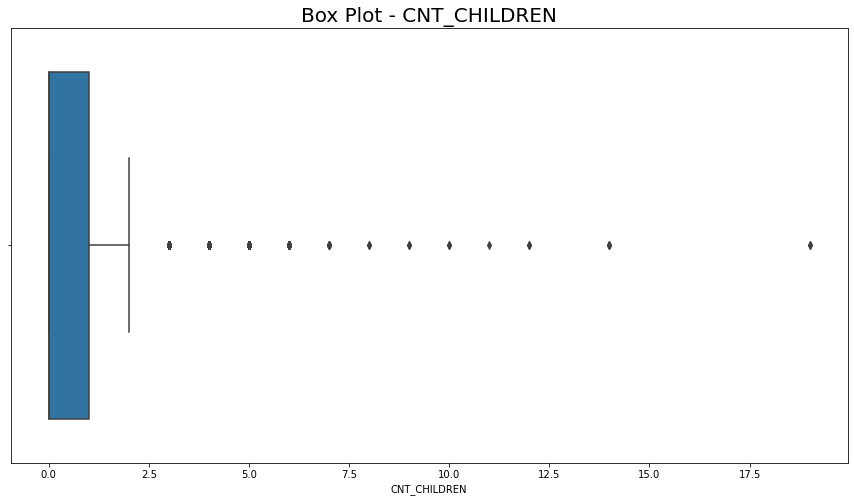

Data points appear above the UPPER_WHISKER 3 can be statistically considered as the Outliers and can be imputed with the upper_Whisker.


In [47]:
print("Statistical Summary :\n",application_dataset['CNT_CHILDREN'].describe())
print("Unique Values & Counts\n",application_dataset['CNT_CHILDREN'].value_counts(normalize =True) * 100)
plt.figure(figsize = (15,8))

sns.boxplot(application_dataset['CNT_CHILDREN'])
plt.title("Box Plot - CNT_CHILDREN", fontsize = 20 )
plt.show()
Q1 = application_dataset['CNT_CHILDREN'].quantile(0.25)
Q3 = application_dataset['CNT_CHILDREN'].quantile(0.75)
IQR = Q3 - Q1
lower_whisker = (Q1 - 1.5 * IQR)
upper_whisker = (Q3 + 1.5 * IQR)
print("Data points appear above the UPPER_WHISKER {} can be statistically considered as the Outliers and can be imputed with the upper_Whisker.".format(math.ceil(upper_whisker)))

#### Many data points appear above the UPPER_WHISKER 2.5 can be statistically considered as the Outliers.
#### But in real time,there exists families with 10-12 childern

#### AMT_INCOME_TOTAL

Satitistical Summary :
 count    3.051850e+05
mean     1.686140e+05
std      2.376652e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.458000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


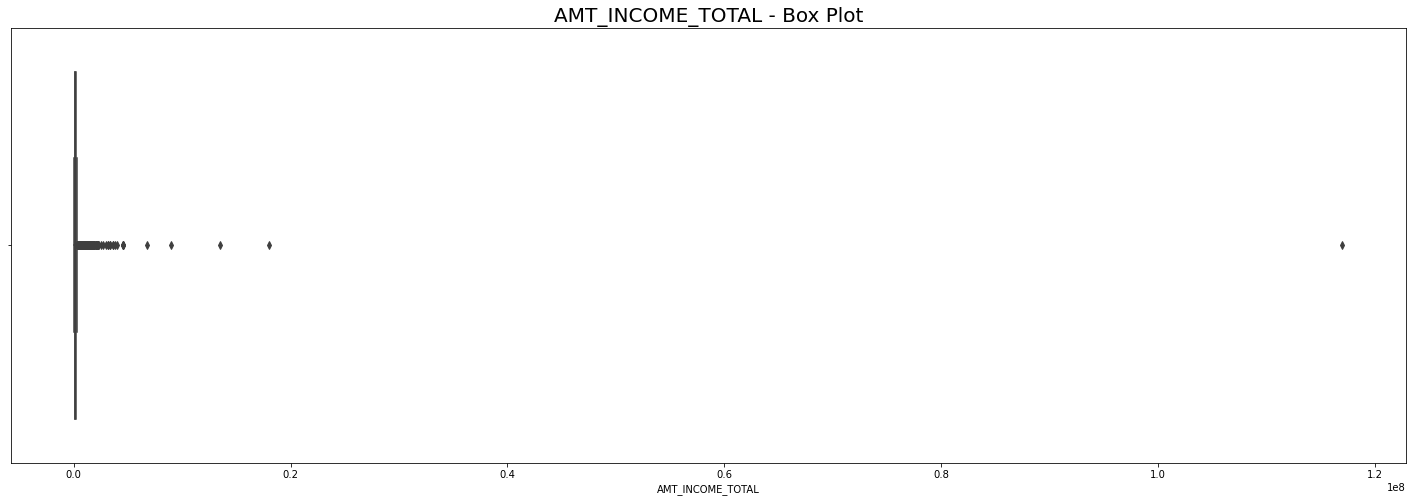

Data points appear above the UPPER_WHISKER 337500.0 can be statistically considered as the Outliers


In [48]:
print("Satitistical Summary :\n",application_dataset['AMT_INCOME_TOTAL'].describe())
plt.figure(figsize = (25,8))

sns.boxplot(application_dataset['AMT_INCOME_TOTAL'])
plt.title("AMT_INCOME_TOTAL - Box Plot", fontsize = 20 )
plt.show()

Q1 = application_dataset['AMT_INCOME_TOTAL'].quantile(0.25)
Q3 = application_dataset['AMT_INCOME_TOTAL'].quantile(0.75)
IQR = Q3 - Q1
lower_whisker = (Q1 - 1.5 * IQR)
upper_whisker = (Q3 + 1.5 * IQR)

print("Data points appear above the UPPER_WHISKER {} can be statistically considered as the Outliers".format(upper_whisker))

#### Many data points appear above the UPPER_WHISKER 337500.0 are clustered and one data is tto far away.
#### But in real time the Income has no boundaries and can be high for different Income Types.

#### AMT_CREDIT

 Statistical Summary :
 count    3.051850e+05
mean     5.992816e+05
std      4.020170e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.147775e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64


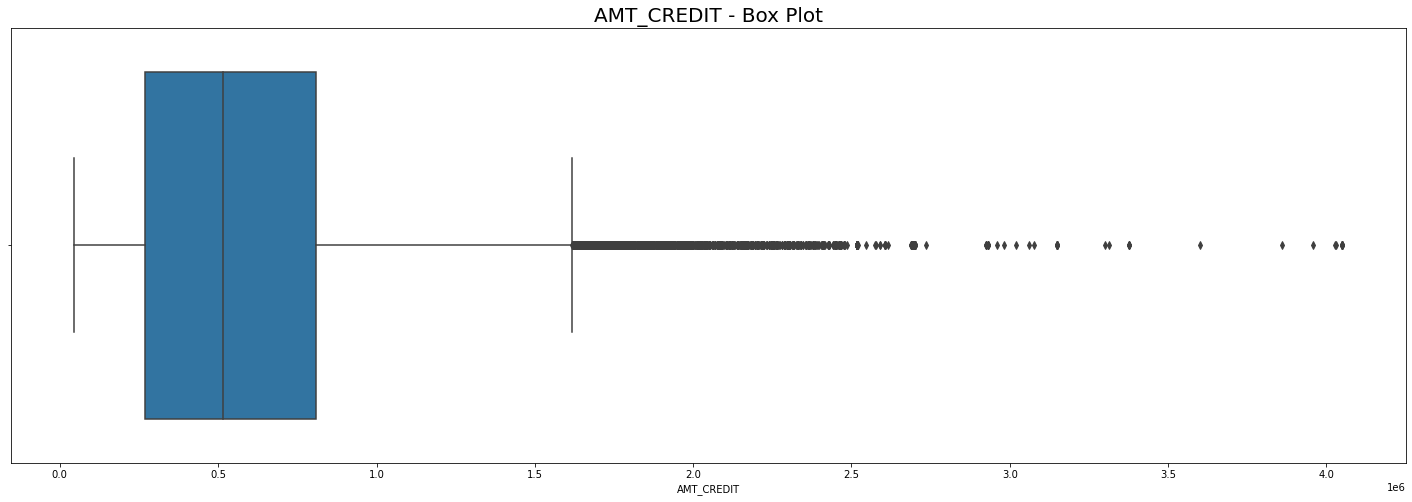

Data points appear above the UPPER_WHISKER 1616625.0 can be statistically considered as the Outliers.


In [49]:
print(" Statistical Summary :\n",application_dataset['AMT_CREDIT'].describe())
plt.figure(figsize = (25,8))

sns.boxplot(application_dataset['AMT_CREDIT'])
plt.title("AMT_CREDIT - Box Plot", fontsize = 20 )
plt.show()

Q1 = application_dataset['AMT_CREDIT'].quantile(0.25)
Q3 = application_dataset['AMT_CREDIT'].quantile(0.75)
IQR = Q3 - Q1
lower_whisker = (Q1 - 1.5 * IQR)
upper_whisker = (Q3 + 1.5 * IQR)

print("Data points appear above the UPPER_WHISKER {} can be statistically considered as the Outliers.".format(upper_whisker))

#### Many data points appear to be clustered above the UPPER_WHISKER 1616625.0  and many far away from the Upper_WHISKER.
#### But these values cannot be considered as outliers in real time as the Credit amount might be high for high Income groups

#### AMT_ANNUITY

 Statistical Summary :
 count    305185.000000
mean      27136.759613
std       14476.069729
min        1615.500000
25%       16573.500000
50%       24939.000000
75%       34618.500000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64


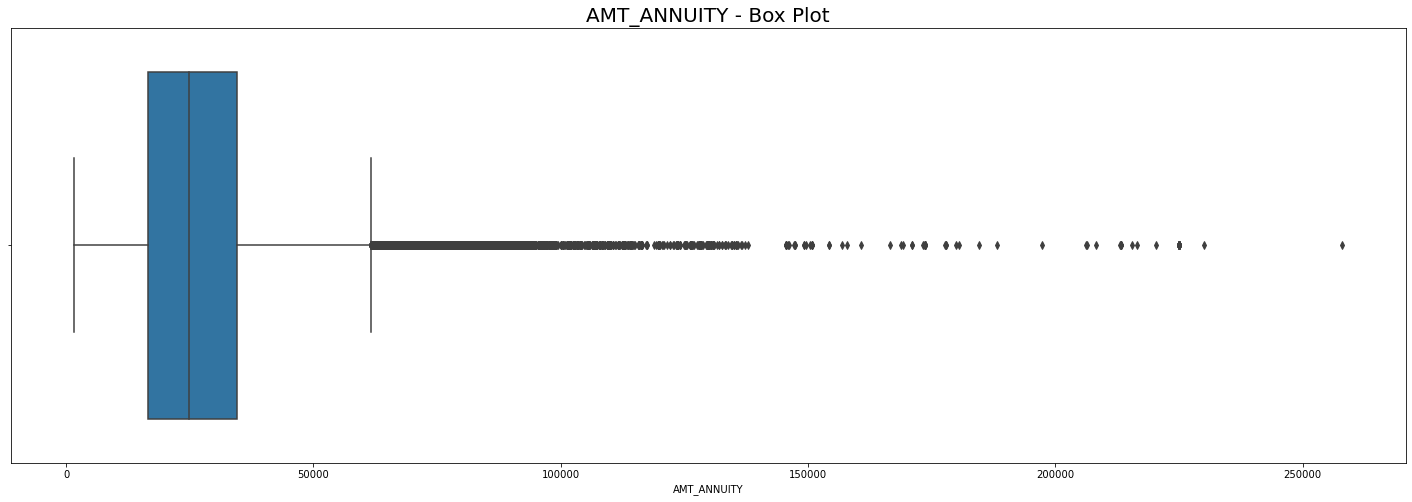

Data points appear above the UPPER_WHISKER 61686.0 can be statistically considered as the Outliers.


In [50]:
print(" Statistical Summary :\n",application_dataset['AMT_ANNUITY'].describe())
plt.figure(figsize = (25,8))

sns.boxplot(application_dataset['AMT_ANNUITY'])
plt.title("AMT_ANNUITY - Box Plot", fontsize = 20 )
plt.show()

Q1 = application_dataset['AMT_ANNUITY'].quantile(0.25)
Q3 = application_dataset['AMT_ANNUITY'].quantile(0.75)
IQR = Q3 - Q1
lower_whisker = (Q1 - 1.5 * IQR)
upper_whisker = (Q3 + 1.5 * IQR)

print("Data points appear above the UPPER_WHISKER {} can be statistically considered as the Outliers.".format(upper_whisker))

#### Many Data points are clustered above the Upper Whisker and many appear to be far away.
#### These Annuity data points  are based on the Credit_Amount and cannot be considered as Outliers

#### AMT_GOODS_PRICE

 Statistical Summary :
 count    3.051850e+05
mean     5.382271e+05
std      3.689286e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64


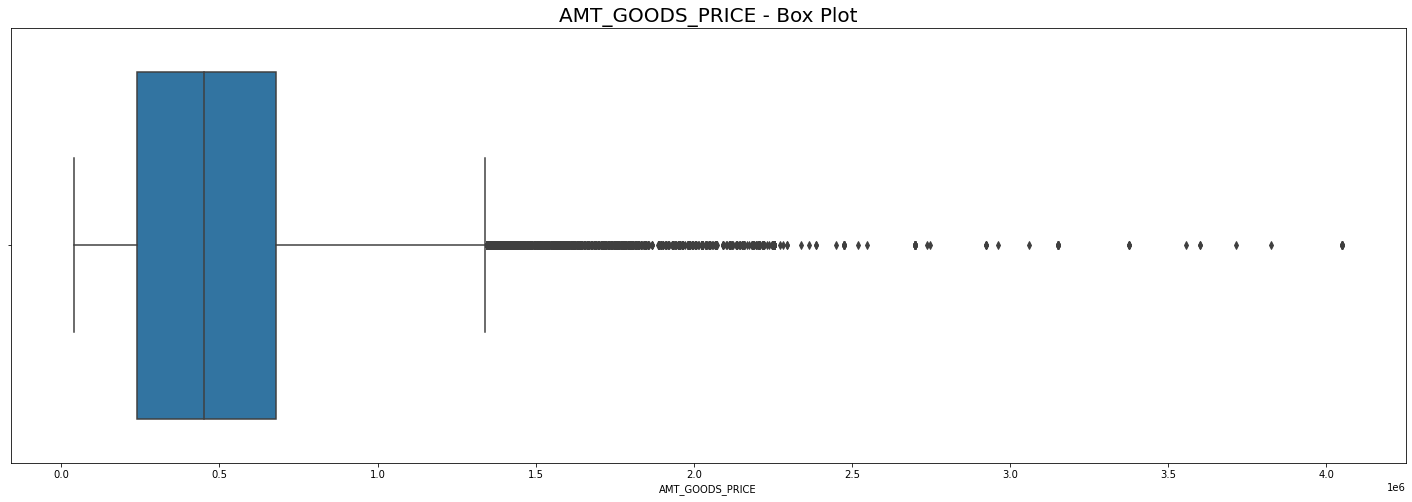

Data points appear above the UPPER_WHISKER 1341000.0 can be statistically considered as the Outliers.


In [51]:
print(" Statistical Summary :\n",application_dataset['AMT_GOODS_PRICE'].describe())
plt.figure(figsize = (25,8))

sns.boxplot(application_dataset['AMT_GOODS_PRICE'])
plt.title("AMT_GOODS_PRICE - Box Plot", fontsize = 20 )
plt.show()

Q1 = application_dataset['AMT_GOODS_PRICE'].quantile(0.25)
Q3 = application_dataset['AMT_GOODS_PRICE'].quantile(0.75)
IQR = Q3 - Q1
lower_whisker = (Q1 - 1.5 * IQR)
upper_whisker = (Q3 + 1.5 * IQR)

print("Data points appear above the UPPER_WHISKER {} can be statistically considered as the Outliers.".format(upper_whisker))

#### Many Data Points are clustered above UpperWhisker and far away from the upper Whisker
#### These points cannot be cosidered as Outliers as we do not enough source related to the Goods Categories & its Price to prove that this data points are outliers 

#### DAYS_BIRTH

 Statistical Summary :
 count    305185.000000
mean      16041.650124
std        4362.501707
min        7489.000000
25%       12420.000000
50%       15756.000000
75%       19685.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64


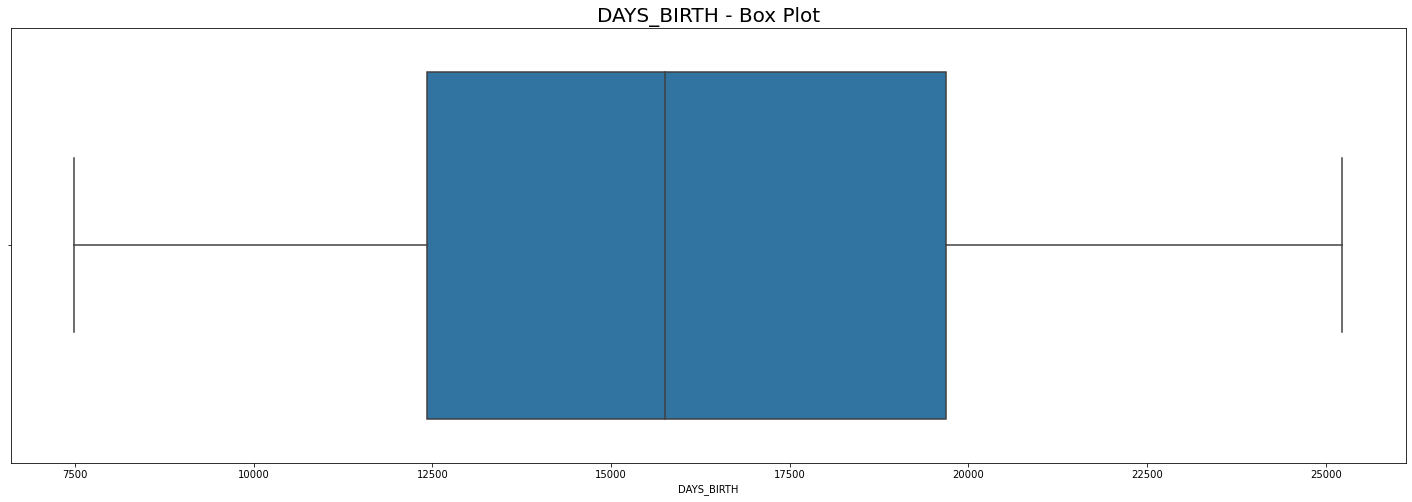

No Data points appear above the UPPER_WHISKER 30582.5


In [52]:
print(" Statistical Summary :\n",application_dataset['DAYS_BIRTH'].describe())
plt.figure(figsize = (25,8))

sns.boxplot(application_dataset['DAYS_BIRTH'])
plt.title("DAYS_BIRTH - Box Plot", fontsize = 20 )
plt.show()

Q1 = application_dataset['DAYS_BIRTH'].quantile(0.25)
Q3 = application_dataset['DAYS_BIRTH'].quantile(0.75)
IQR = Q3 - Q1
lower_whisker = (Q1 - 1.5 * IQR)
upper_whisker = (Q3 + 1.5 * IQR)
birth_max = application_dataset['DAYS_BIRTH'].max()

print("No Data points appear above the UPPER_WHISKER {}".format(upper_whisker))

#### No Outliers Present in DAYS_BIRTH Column

#### DAYS_EMPLOYED

 Statistical Summary :
 count    305185.000000
mean      67786.302803
std      139493.552248
min           0.000000
25%         934.000000
50%        2221.000000
75%        5718.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64


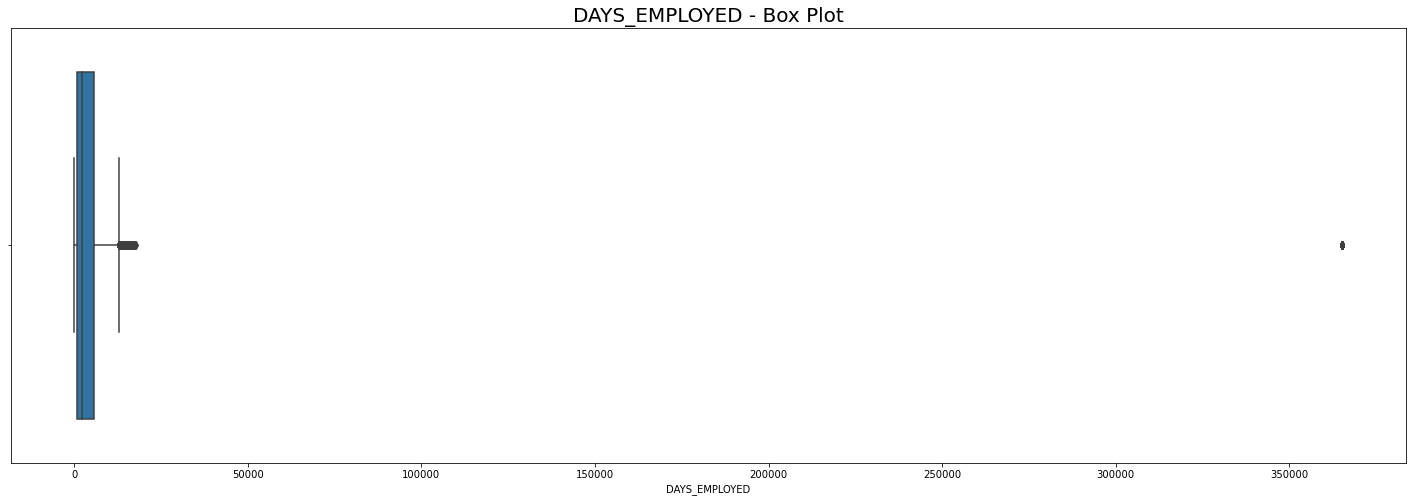

Data points appear above the UPPER_WHISKER 12894.0 can be statistically considered as the Outliers.
Max Value of Days_Employed is 365243 insignificant as Days_Employed cannot exceed the Max DAYS_BIRTH 25229


In [53]:
print(" Statistical Summary :\n",application_dataset['DAYS_EMPLOYED'].describe())
plt.figure(figsize = (25,8))

sns.boxplot(application_dataset['DAYS_EMPLOYED'])
plt.title("DAYS_EMPLOYED - Box Plot", fontsize = 20 )
plt.show()

Q1 = application_dataset['DAYS_EMPLOYED'].quantile(0.25)
Q3 = application_dataset['DAYS_EMPLOYED'].quantile(0.75)
IQR = Q3 - Q1
lower_whisker = (Q1 - 1.5 * IQR)
upper_whisker = (Q3 + 1.5 * IQR)
employed_max = application_dataset['DAYS_EMPLOYED'].max()

print("Data points appear above the UPPER_WHISKER {} can be statistically considered as the Outliers.".format(upper_whisker))
print(f"Max Value of Days_Employed is {employed_max} insignificant as Days_Employed cannot exceed the Max DAYS_BIRTH {birth_max}")

#### Some data points are clusteres above the Upper Whisker & one data point is very far from the Upper Whisker.
####  Max Value of Days_Employed is 365243.0 insignificant as Days_Employed cannot exceed the Max DAYS_BIRTH 25229.0
#### This value should be considered as Outlier and replaced with "      " 

In [54]:
print("No.of Records with Max Value is : ",len(application_dataset[application_dataset['DAYS_EMPLOYED'] == application_dataset['DAYS_EMPLOYED'].max()]))
application_dataset[application_dataset['DAYS_EMPLOYED'] == application_dataset['DAYS_EMPLOYED'].max()]


No.of Records with Max Value is :  55006


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,913500.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.018634,20099,365243,7427.0,3514,1,0,0,1,0,0,NaN,2.0,2,2,WEDNESDAY,14,0,0,0,0,0,0,XNA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11,100015,0,Cash loans,F,N,Y,0,38419.155,148365.0,10678.5,135000.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.015221,20417,365243,5246.0,2512,1,0,0,1,1,0,NaN,2.0,2,2,FRIDAY,7,0,0,0,0,0,0,XNA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,2396.0,0.0,0.0,0.0,0.0,0.0,2.0
23,100027,0,Cash loans,F,N,Y,0,83250.000,239850.0,23850.0,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.006296,24827,365243,9012.0,3684,1,0,0,1,1,0,NaN,2.0,3,3,FRIDAY,12,0,0,0,0,0,0,XNA,0.9876,0.3750,0.9876,0.3750,0.9876,0.3750,0.1640,No,0.0,0.0,0.0,0.0,795.0,0.0,0.0,0.0,0.0,0.0,3.0
38,100045,0,Cash loans,F,N,Y,0,99000.000,247275.0,17338.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.006207,23920,365243,9817.0,4969,1,0,0,1,1,0,NaN,2.0,2,2,FRIDAY,11,0,0,0,0,0,0,XNA,0.9851,0.3333,0.9851,0.3333,0.9851,0.3333,0.0786,No,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
43,100050,0,Cash loans,F,N,Y,0,108000.000,746280.0,42970.5,675000.0,Unaccompanied,Pensioner,Higher education,Single / not married,House / apartment,0.010966,23548,365243,5745.0,4576,1,0,0,1,0,0,NaN,1.0,2,2,WEDNESDAY,9,0,0,0,0,0,0,XNA,0.9851,0.3333,0.9851,0.3333,0.9851,0.3333,0.1903,No,0.0,0.0,0.0,0.0,491.0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305143,456209,0,Cash loans,F,N,Y,0,202500.000,703728.0,29943.0,607500.0,Unaccompanied,Pensioner,Secondary / secondary special,Single / not married,House / apartment,0.031329,22414,365243,11976.0,4171,1,0,0,1,0,0,NaN,1.0,2,2,MONDAY,15,0,0,0,0,0,0,XNA,0.9791,0.0833,0.9791,0.0833,0.9791,0.0833,0.0181,No,11.0,2.0,11.0,0.0,1667.0,0.0,0.0,0.0,1.0,0.0,0.0
305157,456227,0,Cash loans,F,N,Y,0,99000.000,247275.0,16479.0,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Separated,House / apartment,0.007330,24911,365243,11211.0,4213,1,0,0,1,0,0,NaN,1.0,2,2,MONDAY,12,0,0,0,0,0,0,XNA,0.9747,0.0417,0.9747,0.0417,0.9747,0.0417,0.0067,No,1.0,1.0,1.0,1.0,1775.0,0.0,0.0,0.0,0.0,0.0,5.0
305161,456231,0,Cash loans,M,N,Y,0,117000.000,1071909.0,31473.0,936000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.010147,23125,365243,5485.0,4115,1,0,0,1,0,0,NaN,2.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,XNA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,846.0,0.0,0.0,0.0,0.0,1.0,8.0
30

### Sanity Check  - Typecast DataTypes:

In [55]:
application_dataset.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
application_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305185 entries, 0 to 305184
Data columns (total 59 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    305185 non-null  int64  
 1   TARGET                        305185 non-null  int64  
 2   NAME_CONTRACT_TYPE            305185 non-null  object 
 3   CODE_GENDER                   305185 non-null  object 
 4   FLAG_OWN_CAR                  305185 non-null  object 
 5   FLAG_OWN_REALTY               305185 non-null  object 
 6   CNT_CHILDREN                  305185 non-null  int64  
 7   AMT_INCOME_TOTAL              305185 non-null  float64
 8   AMT_CREDIT                    305185 non-null  float64
 9   AMT_ANNUITY                   305185 non-null  float64
 10  AMT_GOODS_PRICE               305185 non-null  float64
 11  NAME_TYPE_SUITE               305185 non-null  object 
 12  NAME_INCOME_TYPE              305185 non-nul

In [57]:
application_dataset['DAYS_BIRTH'] = application_dataset['DAYS_BIRTH'].astype(int)
application_dataset['DAYS_EMPLOYED'] = application_dataset['DAYS_EMPLOYED'].astype(int)
application_dataset['DAYS_REGISTRATION'] = application_dataset['DAYS_REGISTRATION'].astype(int)
application_dataset['DAYS_ID_PUBLISH'] = application_dataset['DAYS_ID_PUBLISH'].astype(int)
application_dataset['CNT_FAM_MEMBERS'] = application_dataset['CNT_FAM_MEMBERS'].astype(int)
application_dataset['DAYS_LAST_PHONE_CHANGE'] = application_dataset['DAYS_LAST_PHONE_CHANGE'].astype(int)
application_dataset['OBS_30_CNT_SOCIAL_CIRCLE'] = application_dataset['OBS_30_CNT_SOCIAL_CIRCLE'].astype(int)                     
application_dataset['OBS_60_CNT_SOCIAL_CIRCLE'] = application_dataset['OBS_60_CNT_SOCIAL_CIRCLE'].astype(int)
application_dataset['DEF_30_CNT_SOCIAL_CIRCLE'] = application_dataset['DEF_30_CNT_SOCIAL_CIRCLE'].astype(int)                     
application_dataset['DEF_60_CNT_SOCIAL_CIRCLE'] = application_dataset['DEF_60_CNT_SOCIAL_CIRCLE'].astype(int)
application_dataset['AMT_REQ_CREDIT_BUREAU_HOUR'] = application_dataset['AMT_REQ_CREDIT_BUREAU_HOUR'].astype(int)
application_dataset['AMT_REQ_CREDIT_BUREAU_DAY'] = application_dataset['AMT_REQ_CREDIT_BUREAU_DAY'].astype(int)
application_dataset['AMT_REQ_CREDIT_BUREAU_WEEK'] = application_dataset['AMT_REQ_CREDIT_BUREAU_WEEK'].astype(int)
application_dataset['AMT_REQ_CREDIT_BUREAU_MON'] = application_dataset['AMT_REQ_CREDIT_BUREAU_MON'].astype(int)
application_dataset['AMT_REQ_CREDIT_BUREAU_QTR'] = application_dataset['AMT_REQ_CREDIT_BUREAU_QTR'].astype(int)
application_dataset['AMT_REQ_CREDIT_BUREAU_YEAR'] = application_dataset['AMT_REQ_CREDIT_BUREAU_YEAR'].astype(int)

Scenarios:
1. Low Income High credit amount & Annuity
2. 

Hypothesis:
Type 1 Error:
1. High Income & Target = 0
2. 
Type 2 Error:
1. Low Income High credit amount, Annuity & Target = 1

In [59]:
### Univariate Analysis:

## 1. Histograms ,boxplots,distribution plots
## 2. pie charts

In [60]:
## BI variate analysis:

## 1. numerical to numerical analysis(scatter plots,correlation,pairplots/jointplots)

## 2. numerical to categorical analysis()

### 3. categorical to categorical analysis(binning,segmentation)

## Multi Variate: 

### 4.heatmap /correlation matrix 

### 5. Stacked bar chart , stacked bar chart(trend)



# UNIVARITE Analysis


### Continuous Numerical  Variables:

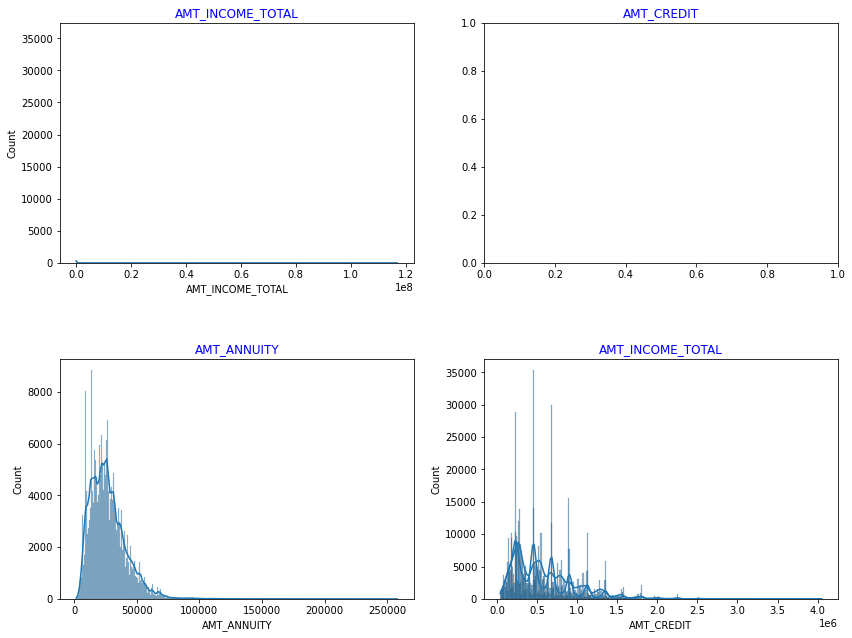

In [89]:
#['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']

fig, ax = plt.subplots(2,2, figsize = (12,10))

sns.histplot(application_dataset['AMT_INCOME_TOTAL'], kde = True, ax = ax[0][0])
sns.histplot(application_dataset['AMT_CREDIT'], kde =True, ax = ax[1][1])
sns.histplot(application_dataset['AMT_ANNUITY'], kde =True, ax = ax[1][0])
sns.histplot(application_dataset['AMT_GOODS_PRICE'], kde =True, ax = ax[1][1])

ax[0][0].set_title('AMT_INCOME_TOTAL', fontsize = 12 , color = 'blue')
ax[0][1].set_title('AMT_CREDIT', fontsize = 12 , color = 'blue')
ax[1][0].set_title('AMT_ANNUITY', fontsize = 12 , color = 'blue')
ax[1][1].set_title('AMT_INCOME_TOTAL', fontsize = 12 , color = 'blue')

plt.subplots_adjust(left = 0.1, bottom = 0.1, right = 1, top = 0.9, wspace = 0.2, hspace = 0.4)
plt.show() 


###  Binning of continuous variables.Check if you need to bin any variable in different categories.
###  Do this for atleast 2 variables - AMT_INCOME_TOTAL, AMT_CREDIT

### AMT_INCOME_TOTAL

In [83]:
# AMT_INCOME_TOTAL

q1 = application_dataset['AMT_INCOME_TOTAL'].quantile(0.25)
q2 = application_dataset['AMT_INCOME_TOTAL'].quantile(0.50)
q3 = application_dataset['AMT_INCOME_TOTAL'].quantile(0.75)
m  = application_dataset['AMT_INCOME_TOTAL'].max()

# Binning AMT_INCOME_TOTAL into AMT_INCOME_TOTAL_bin so we don't loose data and have binned values

application_dataset['AMT_INCOME_TOTAL_bin'] = pd.cut(application_dataset['AMT_INCOME_TOTAL'],[q1, q2, q3,m ], 
                                                     labels = ['Low', 'medium', 'High'])
print(application_dataset['AMT_INCOME_TOTAL_bin'].value_counts())

medium    81748
High      70837
Low       52751
Name: AMT_INCOME_TOTAL_bin, dtype: int64


### AMT_CREDIT

In [92]:
# AMT_CREDIT

q1 = application_dataset['AMT_CREDIT'].quantile(0.25)
q2 = application_dataset['AMT_CREDIT'].quantile(0.50)
q3 = application_dataset['AMT_CREDIT'].quantile(0.75)
m  = application_dataset['AMT_CREDIT'].max()

# Binning AMT_INCOME_TOTAL into AMT_INCOME_TOTAL_bin so we don't loose data and have binned values

application_dataset['AMT_CREDIT_bin'] = pd.cut(application_dataset['AMT_CREDIT'],[q1, q2, q3,m ],
                                               labels = ['Low', 'medium', 'High'])
print(application_dataset['AMT_CREDIT_bin'].value_counts())

medium    77226
High      75364
Low       75036
Name: AMT_CREDIT_bin, dtype: int64


### Target Variable :

0    91.900323
1     8.099677
Name: TARGET, dtype: float64


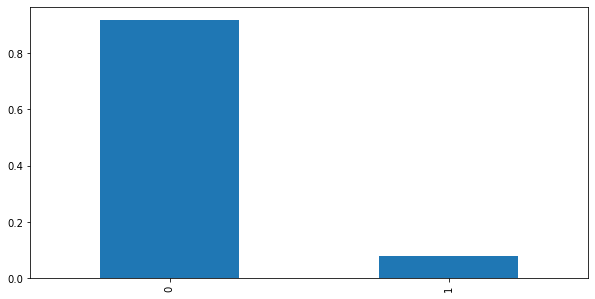

In [95]:
print(application_dataset['TARGET'].value_counts(normalize = True) * 100 )
application_dataset['TARGET'].value_counts(normalize = True).plot.bar(figsize = (10,5))
plt.show()

### Datase is highly Imbalanced,Create 2 datasets  with
###  Target  = 1 , Client with Payment Difficulties - Default Client
###  Target  = 0 , Client without Payemnt Diffiluties - Non Default Client
###  Lets understand how the numerical & categorical variables impact the Approval or denial of the Credit.

In [96]:
# Creating 2 seperate datasets with Target == 0  & Target == 1
application_dataset_0 = application_dataset[application_dataset['TARGET'] == 0 ]
application_dataset_1 = application_dataset[application_dataset['TARGET'] == 1 ]

### Univaritate Analysis of the Target Variable 1 & 0 on Numerical Variables

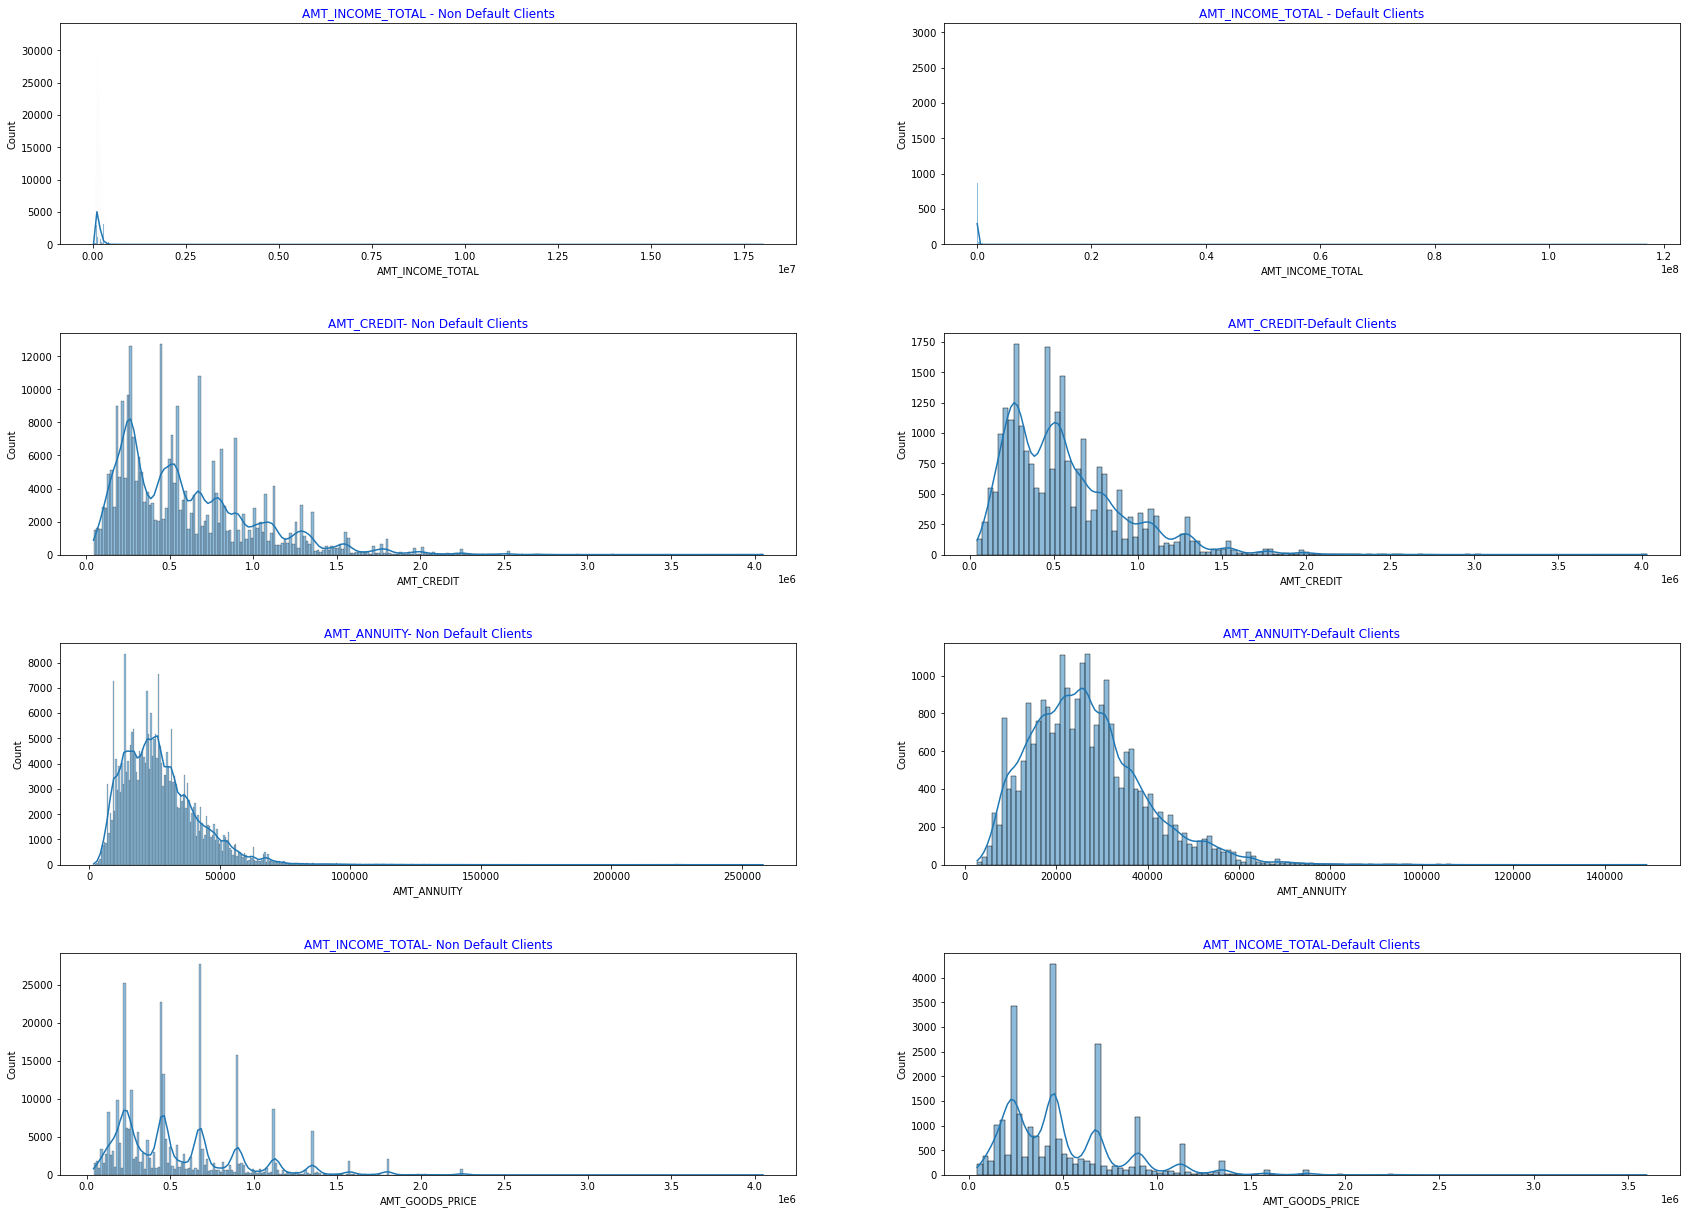

In [98]:
#['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']

fig, ax = plt.subplots(4,2, figsize = (25,20))

sns.histplot(application_dataset_0['AMT_INCOME_TOTAL'],kde = True, ax = ax[0][0])
sns.histplot(application_dataset_1['AMT_INCOME_TOTAL'],kde = True, ax = ax[0][1])

sns.histplot(application_dataset_0['AMT_CREDIT'], kde =True, ax = ax[1][0])
sns.histplot(application_dataset_1['AMT_CREDIT'], kde =True, ax = ax[1][1])

sns.histplot(application_dataset_0['AMT_ANNUITY'], kde =True, ax = ax[2][0])
sns.histplot(application_dataset_1['AMT_ANNUITY'], kde =True, ax = ax[2][1])

sns.histplot(application_dataset_0['AMT_GOODS_PRICE'], kde =True, ax = ax[3][0])
sns.histplot(application_dataset_1['AMT_GOODS_PRICE'], kde =True, ax = ax[3][1])

ax[0][0].set_title('AMT_INCOME_TOTAL - Non Default Clients', fontsize = 12 , color = 'blue')
ax[0][1].set_title('AMT_INCOME_TOTAL - Default Clients', fontsize = 12 , color = 'blue')

ax[1][0].set_title('AMT_CREDIT- Non Default Clients', fontsize = 12 , color = 'blue')
ax[1][1].set_title('AMT_CREDIT-Default Clients', fontsize = 12 , color = 'blue')

ax[2][0].set_title('AMT_ANNUITY- Non Default Clients', fontsize = 12 , color = 'blue')
ax[2][1].set_title('AMT_ANNUITY-Default Clients', fontsize = 12 , color = 'blue')

ax[3][0].set_title('AMT_INCOME_TOTAL- Non Default Clients', fontsize = 12 , color = 'blue')
ax[3][1].set_title('AMT_INCOME_TOTAL-Default Clients', fontsize = 12 , color = 'blue')

plt.subplots_adjust(left = 0.1, bottom = 0.1, right = 1, top = 0.9, wspace = 0.2, hspace = 0.4)
plt.show()

#### ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']


#####  ['CNT_CHILDREN','CNT_FAM_MEMBERS','REGION_POPULATION_RELATIVE','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY']              
 


## Categorical 

#### All categorical with bar   
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
NAME_TYPE_SUITE                0.000000
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
OCCUPATION_TYPE               31.351475
WEEKDAY_APPR_PROCESS_START     0.000000
ORGANIZATION_TYPE              0.000000

#### ['NAME_CONTRACT_TYPE','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
#### 'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE']


#### ['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY']



## Read Previous_Application.CSV Files from Dataset Directory

In [ ]:
previous_file_path = os.path.join(os.getcwd(), os.getcwd()+"/Datasets", "previous_application.csv")

In [ ]:
previous_file_path

In [ ]:
previous_dataset = pd.read_csv(previous_file_path)

In [ ]:
previous_dataset.head(10)

In [ ]:
previous_dataset.info()

### Basic stats about rows and columns and Missing values:

In [ ]:
previous_dataset.shape

### Statistics Summary of the Numerical Data Columns:

In [ ]:
previous_dataset.describe()

### From the Shape,We Can See that 1670214 rows and 37 columns, these 37 columns may not be useful for the ### analysis,we can eliminate irrelevant columns and perform analysis on the selected ones which are important to the business logic.

### Missing values Identification:



### 1 . Calculate the Missing values percentage formula = (missing values in each row/ total rows) * 100 for each and every column.

In [ ]:
missing_values_previous = (previous_dataset.isnull().sum()/len(previous_dataset))*100

In [ ]:
missing_values_previous

#### RATE_INTEREST_PRIMARY          99.643698
#### RATE_INTEREST_PRIVILEGED       99.643698

#### Need to understand if the specific variables data helps in Accepting or Rejecting the Loan.

In [ ]:
## drop the columns whenever missing values greater than 40% because we cant use these for analysis

columns_to_drop_previous = previous_dataset.columns[previous_dataset.isnull().sum() >= (0.40*len(previous_dataset))]
len(columns_to_drop_previous)

In [ ]:
previous_dataset.drop(columns_to_drop_previous, inplace = True, axis = 1)

In [ ]:
previous_dataset.columns

### Eliminate the records if missing values percentage greater  than 0% and less than or equal to 5%.
### since these are very less records proportion to total records,we can eliminate the records..!!

In [ ]:
Five_percentage_columns_previous = previous_dataset.columns[(previous_dataset.isnull().sum() <= (0.05*len(previous_dataset)))&(previous_dataset.isnull().sum() > (0*len(previous_dataset)))]

In [ ]:
Five_percentage_columns_previous

In [ ]:
## verify the above records drop the above columns wherever it is null.
(previous_dataset.isnull().sum()/len(previous_dataset))*100

In [ ]:
## drop the missing values records for the above columns 
## columns used : ['AMT_CREDIT', 'PRODUCT_COMBINATION']
previous_dataset = previous_dataset.dropna(subset=Five_percentage_columns_previous).reset_index(drop=True)

In [ ]:
previous_dataset.head()

In [ ]:
previous_dataset.describe()

## Conversion of negative to positive:

In [ ]:
#DAYS_DECISION,SELLERPLACE_AREA,DAYS_FIRST_DRAWING

previous_dataset['DAYS_DECISION'] = previous_dataset['DAYS_DECISION'].abs()
previous_dataset['SELLERPLACE_AREA'] = previous_dataset['SELLERPLACE_AREA'].abs()

### Why should we convert the above columns into positive values:
    
#### 1.Days & Sellar Area cannot be negative, hence to convert these Columns into positive values.

## Missing values Imputation for categorical Variables:

In [ ]:
## identify the categorical columns
categorical_columns_previous = previous_dataset.select_dtypes(include=["bool","object","category"]).columns

In [ ]:
categorical_columns_previous

In [ ]:
## Null percentage for categorical columns
((previous_dataset[categorical_columns_previous].isnull().sum())/len(previous_dataset))*100

#### No Missing values present in the Categorical Columns

## Missing values Imputation for numerical columns:

In [ ]:
numerical_columns_previous = previous_dataset.select_dtypes(include=["number"]).columns

In [ ]:
numerical_columns_previous

In [ ]:
((previous_dataset[numerical_columns_previous].isnull().sum())/len(previous_dataset))*100

### AMT_ANNUITY - Median

### AMT_GOODS - Median

### CNT_PAYMENT - Mode